In [2]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 24.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=485897341afeaef46c6484fdbafa873dc297d4c6a1471d0fbb162513ec422a2f
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


Rainfall is:  4.674960803701652


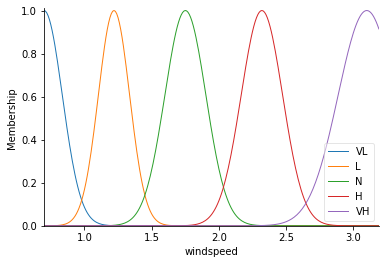

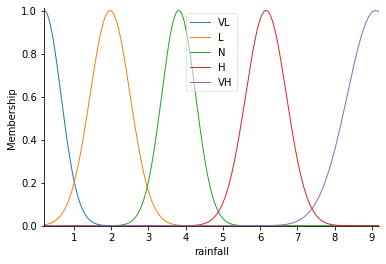

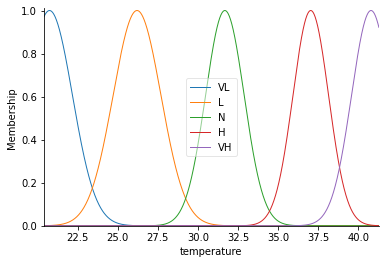

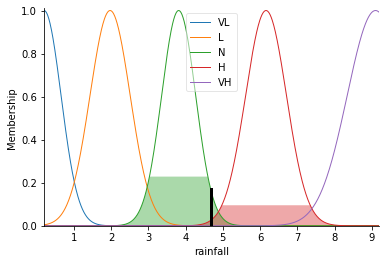

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

#create input
windspeed = ctrl.Antecedent(np.arange(0.7, 3.2, 0.01), 'windspeed')
temperature = ctrl.Antecedent(np.arange(20.4, 41.3, 0.01), 'temperature')

#output
rainfall = ctrl.Consequent(np.arange(0.2, 9.2, 0.01), 'rainfall')

#create func
#wind-speed
windspeed['VL'] = fuzz.gaussmf(windspeed.universe, 0.7,0.1356)
windspeed['L'] = fuzz.gaussmf(windspeed.universe, 1.22,0.1164)
windspeed['N'] = fuzz.gaussmf(windspeed.universe, 1.751,0.1527)
windspeed['H'] = fuzz.gaussmf(windspeed.universe, 2.32, 0.1542)
windspeed['VH'] = fuzz.gaussmf(windspeed.universe, 3.1, 0.213)

#temperature
temperature['VL'] = fuzz.gaussmf(temperature.universe, 20.74  , 1.431)
temperature['L'] = fuzz.gaussmf(temperature.universe, 26.2,1.493)
temperature['N'] = fuzz.gaussmf(temperature.universe, 31.68, 1.203)
temperature['H'] = fuzz.gaussmf(temperature.universe, 37.04, 1.111)
temperature['VH'] = fuzz.gaussmf(temperature.universe, 40.8, 1.216)

#rainfall
rainfall['VL'] = fuzz.gaussmf(rainfall.universe, 0.2, 0.455)
rainfall['L'] = fuzz.gaussmf(rainfall.universe, 1.973, 0.5384)
rainfall['N'] = fuzz.gaussmf(rainfall.universe,  3.814, 0.4566)
rainfall['H'] = fuzz.gaussmf(rainfall.universe,  6.16, 0.5474)
rainfall['VH'] = fuzz.gaussmf(rainfall.universe,  9.1, 0.7591)

#view graph
windspeed.view()
rainfall.view()
temperature.view()

#Rule
rule1 = ctrl.Rule(windspeed['VL'] & temperature['VL'], rainfall['VL'])
rule2 = ctrl.Rule(windspeed['VL'] & temperature['L'], rainfall['VL'])
rule3 = ctrl.Rule(windspeed['VL'] & temperature['N'], rainfall['L'])
rule4 = ctrl.Rule(windspeed['VL'] & temperature['H'], rainfall['L'])
rule5 = ctrl.Rule(windspeed['VL'] & temperature['VH'], rainfall['N'])
rule6 = ctrl.Rule(windspeed['L'] & temperature['VL'], rainfall['VL'])
rule7 = ctrl.Rule(windspeed['L'] & temperature['L'], rainfall['VL'])
rule8 = ctrl.Rule(windspeed['L'] & temperature['N'], rainfall['L'])
rule9 = ctrl.Rule(windspeed['L'] & temperature['H'], rainfall['N'])
rule10 = ctrl.Rule(windspeed['L'] & temperature['VH'], rainfall['N'])
rule11 = ctrl.Rule(windspeed['N'] & temperature['VL'], rainfall['L'])
rule12 = ctrl.Rule(windspeed['N'] & temperature['L'], rainfall['L'])
rule13 = ctrl.Rule(windspeed['N'] & temperature['N'], rainfall['N'])
rule14 = ctrl.Rule(windspeed['N'] & temperature['H'], rainfall['H'])
rule15 = ctrl.Rule(windspeed['N'] & temperature['VH'], rainfall['H'])
rule16 = ctrl.Rule(windspeed['H'] & temperature['VL'], rainfall['L'])
rule17 = ctrl.Rule(windspeed['H'] & temperature['L'], rainfall['N'])
rule18 = ctrl.Rule(windspeed['H'] & temperature['N'], rainfall['H'])
rule19 = ctrl.Rule(windspeed['H'] & temperature['H'], rainfall['H'])
rule20 = ctrl.Rule(windspeed['H'] & temperature['VH'], rainfall['H'])
rule21 = ctrl.Rule(windspeed['VH'] & temperature['VL'], rainfall['N'])
rule22 = ctrl.Rule(windspeed['VH'] & temperature['L'], rainfall['N'])
rule23 = ctrl.Rule(windspeed['VH'] & temperature['N'], rainfall['H'])
rule24 = ctrl.Rule(windspeed['VH'] & temperature['H'], rainfall['H'])
rule25 = ctrl.Rule(windspeed['VH'] & temperature['VH'], rainfall['VH'])


#compute
rainfalling_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10,
                                       rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20,
                                       rule21, rule22, rule23, rule24, rule25])
rainfalling = ctrl.ControlSystemSimulation(rainfalling_ctrl)
rainfalling.input['windspeed']=1.42
rainfalling.input['temperature']=37
rainfalling.compute()
print('Rainfall is: ',rainfalling.output['rainfall'])
rainfall.view(sim=rainfalling)